<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="HEIG-VD Logo" width="100" align="right" /> 

# Cours TAL - Laboratoire 3<br/>*Depedency parser* pour le français dans spaCy

**Objectif**

Évaluer l'analyseur syntaxique en dépendances fourni par spaCy dans le modèle `fr_core_news_sm`, puis le comparer avec un analyseur entraîné par vous-mêmes.  Les données sont les mêmes qu'au Labo 2 et la démarche du labo est similaire aussi.

## 1. Prise en main de l'analyseur de spaCy

In [79]:
import spacy
nlp = spacy.load("fr_core_news_sm") # charge la pipeline

**1a.** Pour la pipeline `fr_core_news_sm`, veuillez afficher les traitements disponibles, puis désactiver tous les traitements sauf `tok2vec`, `morphologizer` et `parser`, puis vérifiez que la désactivation a bien fonctionné.

In [80]:
# Veuillez écrire votre code ici.
print("Traitements disponibles : " + ",".join(nlp.pipe_names))
nlp.disable_pipes("attribute_ruler", "lemmatizer", "ner")
print("Traitements disponibles : " + ",".join(nlp.pipe_names))

Traitements disponibles : tok2vec,morphologizer,parser,attribute_ruler,lemmatizer,ner
Traitements disponibles : tok2vec,morphologizer,parser


In [81]:
from spacy.lang.fr.examples import sentences
s1 = sentences[2] # prenons la 3e phrase comme exemple

**1b.** Veuillez analyser `s1` avec la pipeline `nlp` puis afficher chaque token, son POS tag, et son étiquette indiquant la relation de dépendance (entre crochets, après le token).  Quelle information essentielle manque dans cette représentation ?

Note : le *morphologizer* fournit aussi les POS tags.  La liste des tags possibles est [fournie par spaCy](https://spacy.io/models/fr#fr_core_news_md-labels).  

In [82]:
# Veuillez écrire votre code ici.
doc = nlp(s1)
for token in doc:
    print(f"{token} [{token.pos_}] [{token.dep_}]")
    
# Quelle information essentielle manque dans cette représentation ?
# On ne voit pas le sens de la dépendance. On ne voit pas où est la tête et quel est le mot dépendant.

San [DET] [det]
Francisco [PROPN] [nsubj]
envisage [VERB] [ROOT]
d' [ADP] [case]
interdire [NOUN] [xcomp]
les [DET] [det]
robots [NOUN] [obj]
coursiers [ADJ] [amod]
sur [ADP] [case]
les [DET] [det]
trottoirs [NOUN] [obl:mod]


**1c.** Veuillez afficher tous les groupes de mots qui sont soit des `nsubj` soit des `obj` dans la phrase `s1` (c'est à dire les sujets et les objets du verbe).   Indication : le sous-arbre d'un token *t* est accessible comme `t.subtree`. 

In [83]:
# Veuillez écrire votre code ici.
for token in doc:
    if token.dep_ in ["nsubj", "obj"]:
        print(" ".join([t.text for t in token.subtree]))

San Francisco
les robots coursiers


## 2. Évaluation quantitative de l'analyseur sur une phrase 

Les données sont les mêmes que celles du Labo 2.  Vous les avez déjà transformées au Labo 2 dans un format utilisable par spaCy, dans un dossier nommé `Labo2/spacy_data` que vous allez réutiliser.  Les trois fichiers contiennent des phrases en français annotées aussi avec les arbres de dépendance.  Le fichier `fr-ud-train.conllu` est destiné à l'entraînement, `fr-ud-dev.conllu` au réglage des paramètres, et `fr-ud-test.conllu` à l'évaluation finale.

**2a.** En inspectant un des fichiers d'origine avec un éditeur texte, veuillez indiquer dans quelles colonnes se trouvent les informations sur les relations de dépendance, et comment elles sont représentées.

In [84]:
# Veuillez écrire votre réponse dans cette cellule.
# La 7e colonne contient le chiffre indiquant la position de quel mot de la phrase dépend le mot courant. Si le mot courant est la racine de la phrase, la colonne contient 0.
# Les labels relations de dépendance sont dans la 8e colonne (en comptant la première donnant le numéro de ligne du paragraphe). Elles sont représentées par du texte indiquant la nature du token.

In [85]:
from spacy.tokens import DocBin, Doc
test_data = DocBin().from_disk("../LABO2/spacy_data/fr-ud-test.spacy")
for doc in test_data.get_docs(nlp.vocab):  # exemple
    for sent in doc.sents:
        print(sent)

Je sens qu'entre ça et les films de médecins et scientifiques fous que nous avons déjà vus, nous pourrions emprunter un autre chemin pour l'origine.
On pourra toujours parler à propos d'Averroès de "décentrement dele Sujet".
« Il a été largement démontré que la population civile dele territoire non autonome dele Sahara occidental est l'objet de diverses atteintes àles droits humains, comme la détention arbitraire, les coups et les tortures », écrit l'ONG internationale, implantée dans 35 pays, citée par l'agence de presse sahraouie.
1er : début de la présidence lituanienne de l'Organisation pour la Sécurité et la Coopération en Europe (OSCE) (jusqu'àle 31 décembre), avant l'Irlande (2012) et l'Ukraine (2013).
Et pourtant, lors de sa première visite en Afrique subsaharienne, l'été 2007, il montre les dents dans un discours humiliant pour les Africains, prononcé à l'Université Cheikh Anta Diop de Dakar.
Les spéculations autour dele match sont à leur paroxysme.
Ils ne citent pas son nom, 

**2b**. On rapplle que les données des fichiers convertis peuvent être chargées dans un objet de type `DocBin`.  Ici, un tel objet contient un ensemble de documents, chacun contenant 10 phrases.  Chaque document est un objet de type `Doc`.  Le code donné ci-dessous vous permet de charger les données de test et vous montre comment les afficher.

* Veuillez stocker la *7e phrase du 2e document des données de test* dans une variable nommée `s2`.
* Veuillez afficher cette phrase (elle commence par "Trois ans").

In [86]:
# Veuillez écrire votre code ici.
docs = list(test_data.get_docs(nlp.vocab))
s2 = list(docs[1].sents)[6]
print(s2)

Trois ans plus tard, il tient un discours sur la crise.


**2c.** En utilisant `displaCy` comme expliqué [ici](https://spacy.io/usage/visualizers) veuillez afficher graphiquement l'arbre de dépendances de la phrase `s2` tel qu'il est fourni dans les données.  Pour être affichée, la phrase doit être transformée en objet `Doc`.

In [87]:
# Veuillez écrire votre code ici.
from spacy import displacy
doc = s2.as_doc()
displacy.render(doc, style="dep", options={"offset_x": 18})

**2d.** En utilisant `displaCy`, veuillez également afficher l'arbre de dépendances calculé par la pipeline `nlp` pour cette même phrase `s2`.  Pour être analysée et affichée, la phrase doit être transformée en objet `Doc`.

In [88]:
# Veuillez écrire votre code ici.
doc = nlp(s2.as_doc())
displacy.render(doc, style="dep", options={"offset_x": 18})

**2e.** Veuillez comparer les deux arbres de dépendances et indiquer ici les différences.  Quel est le taux de correction de la pipeline `nlp` sur cette phrase ?

Suggestion : il peut être utile de sauvegarder les deux arbres dans des images SVG, en écrivant dans un fichier le résultat retourné par `displacy.render` avec l'option `jupyter = False`.

In [89]:
# Veuillez écrire votre réponse ici.
# Les deux arbres graphes sont similaires, à quelques détails près. Avec la pipeline, "ans" est dépendant de "plus" (obl:mod) au lieu de "tient" (obl), et "tard," dépend de "tient" (advmod) au lieu de "ans" (advmod). Le taux de précision est de 0.818 (2 erreurs sur un total de 11 dépendances).  

**2f.**  Veuillez appliquer le `Scorer` de spaCy (voir Labo 2) et afficher les deux scores qu'il produit pour l'analyse en dépendances (avec trois décimales après la virgule).  Retrouvez-vous les scores de la question précédente ? Pourquoi ?

In [90]:
from spacy.scorer import Scorer
from spacy.training import Example

In [91]:
# Veuillez écrire votre code et votre réponse ici.
scorer = Scorer()
examples = Example(nlp(s2.as_doc()), s2.as_doc())
score = scorer.score(examples=[examples])
print(f"Precision LAS: {score['dep_las']:.3f}") # las = labeled attachment score -> dépendance correcte avec label de la dépendance correct
print(f"Precision UAS: {score['dep_uas']:.3f}") # uas = unlabeled attachment score -> dépendance correcte sans label

# Retrouvez-vous les scores de la question précédente ? Pourquoi ?
# Pour l'UAS oui, ce qui est normal puisqu'on ne prend pas en compte les labels dans ce calcul, on obtient donc 2 erreurs pour 11 dépendances. Or 9/11 = 0.818. C'est pareil pour LAS, les deux erreurs sont des erreurs de dépendances avant tout. Donc même si le label est correct dans une des deux dépendances erronnées, on compte quand même comme étant une dépendance fausse et on retrouve le calcul 9/11 = 0.818

Precision LAS: 0.818
Precision UAS: 0.818


## 3. Évaluation du *dependency parser* de `fr_core_news_sm` sur l'ensemble des phrases test

**3a.** Veuillez calculer les deux scores qui caractérisent l'analyseur en dépendances de la pipeline `nlp` sur toutes les données de test présentes dans `test_data`.  Comment se comparent ces scores avec ceux mentionnés [dans la documentation de fr_core_news_sm](https://spacy.io/models/fr#fr_core_news_sm) ?

In [92]:
# Veuillez écrire votre code ici.
scorer = Scorer()
examples = [Example(nlp(doc.__str__()), doc) for doc in docs]
total_score = scorer.score(examples=examples)
print(f"Precision LAS: {total_score['dep_las']:.3f}") # las = labeled attachment score -> dépendance correcte avec label de la dépendance correct
print(f"Precision UAS: {total_score['dep_uas']:.3f}") # uas = unlabeled attachment score -> dépendance correcte sans label

# Comment se comparent ces scores avec ceux mentionnés dans la documentation de fr_core_news_sm ?
# On garde une certaine proportion entre le fait que LAS soit inférieur à UAS (ce qui semble assez logique puisque LAS est plus exigent). En revanche, on est relativement loin des LAS = 0.83 et des UAS = 0.88 mentionné dans la documentation.

Precision LAS: 0.602
Precision UAS: 0.731


**3b.** Le *scorer* fournit également des scores détaillés pour chaque type de relation de dépendances.  Veuillez afficher ces valeurs dans un tableau proprement formaté, trié par score F1 décroissant, avec trois décimales.

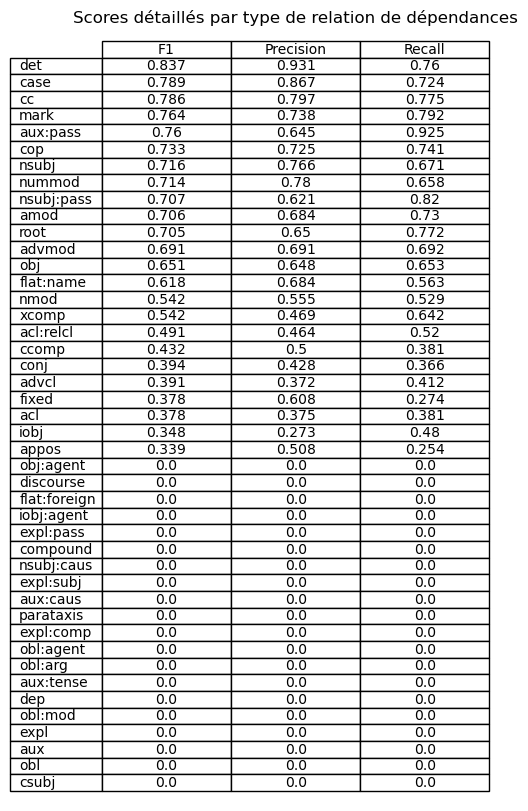

In [93]:
# Veuillez écrire votre code ici
import pandas as pd
import matplotlib.pyplot as plt

def display_score(what_score):
    df = pd.DataFrame(what_score['dep_las_per_type'], index=["f", "p", "r"])
    #Rajouter un index pour les labels
    df = df.rename(index={"f": "F1", "p": "Precision", "r": "Recall"})
    df = df.map(lambda x: round(x, 3))
    df = df.T
    df = df.sort_values(by="F1", ascending=False)
    
    plt.figure(figsize=(5, 10))
    plt.title("Scores détaillés par type de relation de dépendances")
    plt.axis('off')
    plt.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', cellLoc='center')
    plt.show()
display_score(total_score)

## 4. Entraîner puis évaluer un nouveau *parser* français dans spaCy

Le but de cette partie est d'entraîner une pipeline spaCy pour le français sur les données de `fr-ud-train.conllu`, puis de comparer le modèle obtenu avec le modèle prêt-à-l'emploi testé au point précédent (voir le Labo 2 et les [instructions de spaCy](https://spacy.io/usage/training#quickstart)).

**4a.** Paramétrage de l'entraînement :
* générez un fichier de départ grâce à [l'interface web](https://spacy.io/usage/training#quickstart), en indiquant que vous gardez seulement les composants `morphologizer` et `parser` dans la pipeline ;
* sauvegardez le code généré par spaCy dans un fichier local `base_config.cfg` ;
* générez un fichier `config.cfg` sur votre ordinateur en exécutant la ligne de commande suivante. 

In [67]:
!python -m spacy init fill-config base_config.cfg config.cfg

[+] Auto-filled config with all values
[+] Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


Veuillez effectuer l'entraînement avec la ligne de commande suivante.  Faites plusieurs essais, d'abord avec un petit nombre d'époques (*à indiquer dans config.cfg*), pour estimer le temps nécessaire et observer les messages affichés.  Augmentez progressivement le nombre d'époques, jusqu'à ce que les scores sur le jeu de validation n'augmentent plus (si vous avez le temps).  Pendant combien d'époques entraînez-vous au final ?

In [78]:
# Note : il vaut mieux exécuter cela directement dans une fenêtre de commande, pour voir les logs en temps réel.
!python -m spacy train config.cfg \
  --output ./myDEPparser1 \
  --paths.train ../Labo2/spacy_data/fr-ud-train.spacy \
  --paths.dev ../Labo2/spacy_data/fr-ud-dev.spacy \
  --verbose 

^C


In [ ]:
# Veuillez indiquer ici le nombre d'époques final.
# 4 epochs

**4b.**  Veuillez charger le meilleur modèle (pipeline) dans la variable `nlp2` et afficher ses scores sur les données de test.  Comment se comparent les résultats avec les précédents ?

In [94]:
# Veuillez écrire votre code ici.
nlp2 = spacy.load("./myDEPparser1/model-best/")
total_score_custom = scorer.score(examples=examples)
print(f"Precision LAS: {total_score_custom['dep_las']:.3f}") # las = labeled attachment score -> dépendance correcte avec label de la dépendance correct
print(f"Precision UAS: {total_score_custom['dep_uas']:.3f}") # uas = unlabeled attachment score -> dépendance correcte sans label



Precision LAS: 0.602
Precision UAS: 0.731


**4c.** Veuillez afficher les scores détaillés pour chaque type de relation de dépendances, dans un tableau formaté comme au 3b.

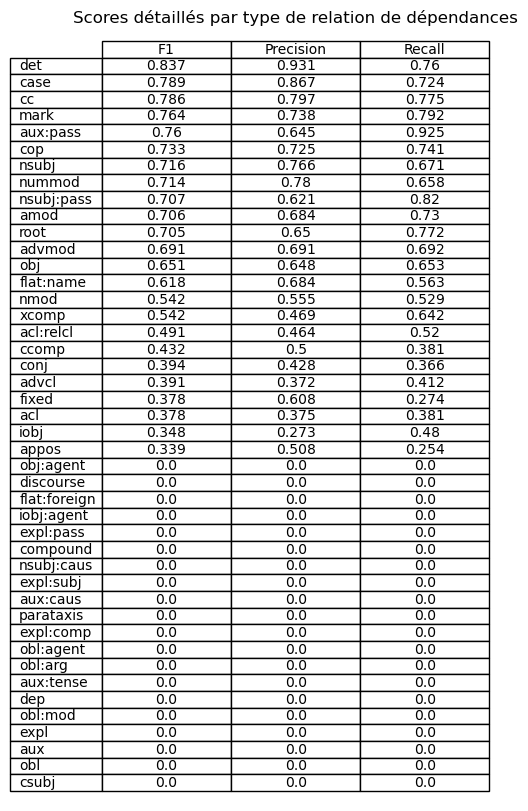

In [95]:
# Veuillez écrire votre code ici.
display_score(total_score)


**4d.** Quels changements observez-vous en haut (3 premiers labels) et en bas du classement ?  Voyez-vous un label pour lequel les scores n'augmentent pas avec le parser entraîné ?

**Fin du Labo.** Veuillez nettoyer ce notebook en gardant seulement les résultats désirés, l'enregistrer, et le soumettre comme devoir sur Cyberlearn.